<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.946439,96.419267,29.313672,-0.007796,204.671582,204.671763,-0.000180
1,0.0,1.0,52.877797,57.418437,73.158261,0.009326,193.463821,193.447887,0.015934
2,0.0,2.0,78.695774,94.794992,89.750285,-0.036761,273.204291,273.229654,-0.025363
3,0.0,3.0,97.950207,66.658262,37.184841,-0.014780,211.778531,211.796566,-0.018035
4,0.0,4.0,48.428715,43.177917,91.803062,-0.015756,193.393939,193.403457,-0.009518
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.861261,78.250735,54.976328,-0.029010,193.059314,193.087093,-0.027778
29996,999.0,26.0,49.819157,78.583386,95.004411,0.001287,233.408241,233.414463,-0.006222
29997,999.0,27.0,40.976566,62.586927,91.887967,-0.011381,205.440079,205.463535,-0.023456
29998,999.0,28.0,32.589900,50.409721,47.889858,-0.018102,140.871378,140.896229,-0.024851


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.946439,96.419267,29.313672,-0.007796,204.671582,204.671763,-0.000180
1,0.0,1.0,52.877797,57.418437,73.158261,0.009326,193.463821,193.447887,0.015934
2,0.0,2.0,78.695774,94.794992,89.750285,-0.036761,273.204291,273.229654,-0.025363
3,0.0,3.0,97.950207,66.658262,37.184841,-0.014780,211.778531,211.796566,-0.018035
4,0.0,4.0,48.428715,43.177917,91.803062,-0.015756,193.393939,193.403457,-0.009518
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.861261,78.250735,54.976328,-0.029010,193.059314,193.087093,-0.027778
29996,999.0,26.0,49.819157,78.583386,95.004411,0.001287,233.408241,233.414463,-0.006222
29997,999.0,27.0,40.976566,62.586927,91.887967,-0.011381,205.440079,205.463535,-0.023456
29998,999.0,28.0,32.589900,50.409721,47.889858,-0.018102,140.871378,140.896229,-0.024851


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.946439  96.419267  29.313672  ...  204.671582  204.671763 -0.000180
      1.0    52.877797  57.418437  73.158261  ...  193.463821  193.447887  0.015934
      2.0    78.695774  94.794992  89.750285  ...  273.204291  273.229654 -0.025363
      3.0    97.950207  66.658262  37.184841  ...  211.778531  211.796566 -0.018035
      4.0    48.428715  43.177917  91.803062  ...  193.393939  193.403457 -0.009518
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   49.861261  78.250735  54.976328  ...  193.059314  193.087093 -0.027778
      26.0   49.819157  78.583386  95.004411  ...  233.408241  233.414463 -0.006222
      27.0   40.976566  62.586927  91.887967  ...  205.440079  205.463535 -0.023456
      28.0   32.589900  50.409721  47.889858  ...  140.871378  140.896229 -0.024851
      29.0   20.172187  51.889163  25.233005  ...  107.299183  107.298448  0.000735

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.946439  96.419267  29.313672  ...  204.671582  204.671763 -0.000180
      1.0    52.877797  57.418437  73.158261  ...  193.463821  193.447887  0.015934
      2.0    78.695774  94.794992  89.750285  ...  273.204291  273.229654 -0.025363
      3.0    97.950207  66.658262  37.184841  ...  211.778531  211.796566 -0.018035
      4.0    48.428715  43.177917  91.803062  ...  193.393939  193.403457 -0.009518
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   49.861261  78.250735  54.976328  ...  193.059314  193.087093 -0.027778
      26.0   49.819157  78.583386  95.004411  ...  233.408241  233.414463 -0.006222
      27.0   40.976566  62.586927  91.887967  ...  205.440079  205.463535 -0.023456
      28.0   32.589900  50.409721  47.889858  ...  140.871378  140.896229 -0.024851
      29.0   20.172187  51.889163  25.233005  ...  107.299183  107.298448  0.000735

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,68.946439,96.419267,29.313672,-0.007796,204.671582,204.671763,-0.000180
1,0.0,1.0,52.877797,57.418437,73.158261,0.009326,193.463821,193.447887,0.015934
2,0.0,2.0,78.695774,94.794992,89.750285,-0.036761,273.204291,273.229654,-0.025363
3,0.0,3.0,97.950207,66.658262,37.184841,-0.014780,211.778531,211.796566,-0.018035
4,0.0,4.0,48.428715,43.177917,91.803062,-0.015756,193.393939,193.403457,-0.009518
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,49.861261,78.250735,54.976328,-0.029010,193.059314,193.087093,-0.027778
29996,999.0,26.0,49.819157,78.583386,95.004411,0.001287,233.408241,233.414463,-0.006222
29997,999.0,27.0,40.976566,62.586927,91.887967,-0.011381,205.440079,205.463535,-0.023456
29998,999.0,28.0,32.589900,50.409721,47.889858,-0.018102,140.871378,140.896229,-0.024851


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    68.946439  96.419267  29.313672  ...  204.671582  204.671763 -0.000180
      1.0    52.877797  57.418437  73.158261  ...  193.463821  193.447887  0.015934
      2.0    78.695774  94.794992  89.750285  ...  273.204291  273.229654 -0.025363
      3.0    97.950207  66.658262  37.184841  ...  211.778531  211.796566 -0.018035
      4.0    48.428715  43.177917  91.803062  ...  193.393939  193.403457 -0.009518
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   49.861261  78.250735  54.976328  ...  193.059314  193.087093 -0.027778
      26.0   49.819157  78.583386  95.004411  ...  233.408241  233.414463 -0.006222
      27.0   40.976566  62.586927  91.887967  ...  205.440079  205.463535 -0.023456
      28.0   32.589900  50.409721  47.889858  ...  140.871378  140.896229 -0.024851
      29.0   20.172187  51.889163  25.233005  ...  107.299183  107.298448  0.000735

[30000 rows x 7 columns]

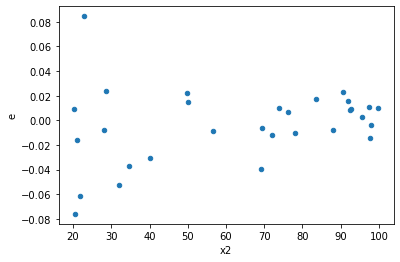

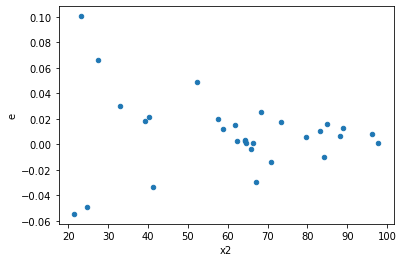

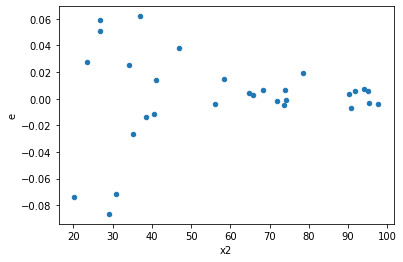

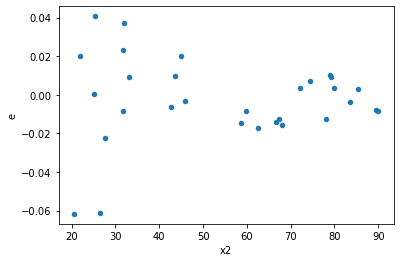

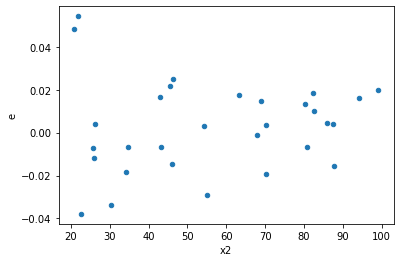

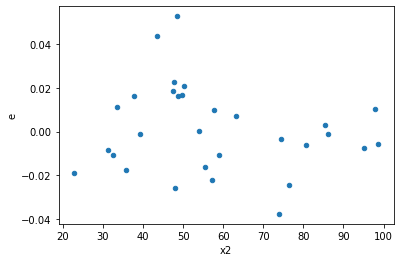

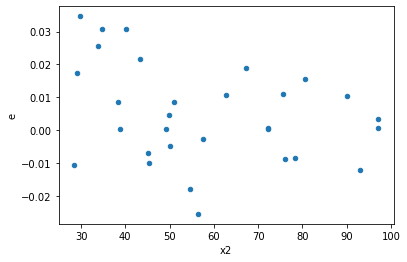

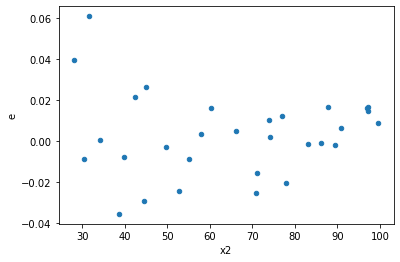

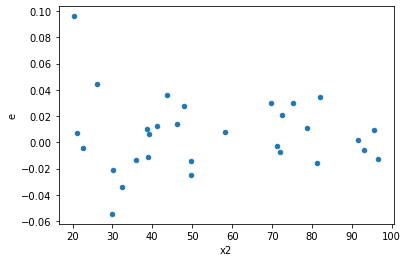

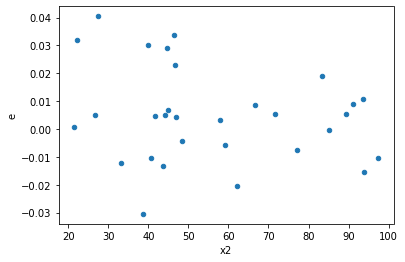

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
32.0,9.0,9.0,0.000917812710638455,0.0032238205494251083,0.00010197919007093945,0.00035820228326945646,3.5125037080631976,0.07521924189132889,0.9623903790543356,0.037609620945664446,Reject005=1 : Homoscedasticity
110.0,9.0,9.0,0.0018038042602111482,0.002699892415427988,0.00020042269557901646,0.0002999880461586654,1.4967768260575827,0.5575313342276862,0.7212343328861569,0.2787656671138431,Reject005=1 : Homoscedasticity
203.0,9.0,9.0,0.0015850389732647214,0.0016637509588115617,0.00017611544147385792,0.00018486121764572908,1.0496593376405858,0.9436305373339904,0.5281847313330048,0.4718152686669952,Reject005=1 : Homoscedasticity
213.0,9.0,9.0,0.0008015486853588336,0.0012295855949227997,8.906096503987041e-05,0.00013662062165808886,1.5340123655400226,0.5339459786959007,0.7330270106520497,0.26697298934795033,Reject005=1 : Homoscedasticity
264.0,9.0,9.0,0.0008992496739083618,0.0020115615492460846,9.991663043426242e-05,0.00022350683880512052,2.236933309637289,0.24613990710811207,0.876930046445944,0.12306995355405603,Reject005=1 : Homoscedasticity
604.0,9.0,9.0,0.003059496987944617,0.004159621381241146,0.0003399441097716241,0.00046218015347123845,1.3595768839228692,0.6546497919605323,0.6726751040197338,0.32732489598026615,Reject005=1 : Homoscedasticity
704.0,9.0,9.0,0.0002357275223044992,0.0009860098943590898,2.6191946922722136e-05,0.00010955665492878775,4.182837390898373,0.044427842287427355,0.9777860788562863,0.022213921143713677,Reject005=0 : Heteroscedasticity
712.0,9.0,9.0,0.0038025018300783613,0.0038252430992406447,0.00042250020334204017,0.0004250270110267383,1.005980607026247,0.9930587756571128,0.5034706121714436,0.4965293878285564,Reject005=1 : Homoscedasticity
765.0,9.0,9.0,0.0013042663030978477,0.001688025073745594,0.00014491847812198307,0.00018755834152728822,1.294233447369035,0.7070685963335452,0.6464657018332274,0.3535342981667726,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.005250237620423911,0.0031221754852911255,0.0005833597356026568,0.0003469083872545695,0.5946731769140454,0.4507181637953327,Reject005=1 : Homoscedasticity
1.0,9.0,9.0,0.0026480609839096077,0.0008809674453052052,0.0002942289982121786,9.788527170057835e-05,0.3326839716525491,0.11668615385269163,Reject005=1 : Homoscedasticity
2.0,9.0,9.0,0.002657821419013171,0.00133388261596579,0.0002953134910014634,0.00014820917955175446,0.5018706698740696,0.3190432867320357,Reject005=1 : Homoscedasticity
3.0,9.0,9.0,0.004353489787081895,0.0009939909203812963,0.00048372108745354386,0.00011044343559792181,0.22832048976679914,0.038455466136201925,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,0.006282276775041876,0.002628931436532615,0.0006980307527824307,0.0002921034929480683,0.4184679425422308,0.21046615119996484,Reject005=1 : Homoscedasticity
5.0,9.0,9.0,0.004705229472238424,0.0008264665499228945,0.0005228032746931582,9.18296166580994e-05,0.1756485108322929,0.01621029146750223,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,0.007125582180360423,0.0007698402072313269,0.0007917313533733803,8.553780080348077e-05,0.10803892057454136,0.002797576275509275,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,0.007917845146780492,0.0017677914153245264,0.0008797605718644992,0.00019642126836939182,0.2232667326214804,0.03581845005613102,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,0.00480870410579262,0.0010800794806514907,0.00053430045619918,0.00012000883118349896,0.22460926205678045,0.036508369665774025,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    673
Reject005=1 : Homoscedasticity      327
Name: Result_test, dtype: int64